## Problem Statement

* The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.


* Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 
    
* The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## Hypothesis Generation

#### Store Level Hypotheses:

* City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
* Population Density: Stores located in densely populated areas should have higher sales because of more demand.
* Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
* Competitors: Stores having similar establishments nearby should have less sales because of more competition.
* Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
* Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
* Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
* Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

    
#### Product Level Hypotheses:

* Brand: Branded products should have higher sales because of higher trust in the customer.
* Packaging: Products with good packaging can attract customers and sell more.
* Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
* Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
* Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
* Advertising: Better advertising of products in the store will should higher sales in most cases.
* Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

### We have train (8523) and test (5681) data set, train data set has both input and output variable(s). 
### We need to predict the sales for test data set.

* Item_Identifier: Unique product ID


* Item_Weight: Weight of product


* Item_Fat_Content: Whether the product is low fat or not


* Item_Visibility: The % of total display area of all products in a store allocated to the particular product


* Item_Type: The category to which the product belongs


* Item_MRP: Maximum Retail Price (list price) of the product


* Outlet_Identifier: Unique store ID


* Outlet_Establishment_Year: The year in which store was established


* Outlet_Size: The size of the store in terms of ground area covered


* Outlet_Location_Type: The type of city in which the store is located


* Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket


* Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

## Importing LIbraries and Understanding Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Read the Data

In [2]:
Bigmart_train_Data = pd.read_csv("Train.csv")

Bigmart_test_Data = pd.read_csv("Test.csv")

In [3]:
Bigmart_train_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
Bigmart_test_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print("BigMart Train Data shape :" , Bigmart_train_Data.shape)

print("BigMart Test Data shape  :" , Bigmart_test_Data.shape)

BigMart Train Data shape : (8523, 12)
BigMart Test Data shape  : (5681, 11)


## Data Visualization

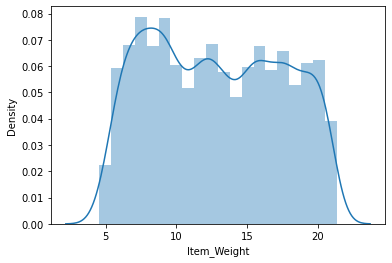

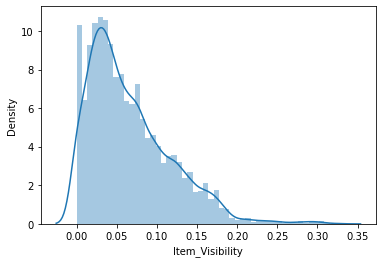

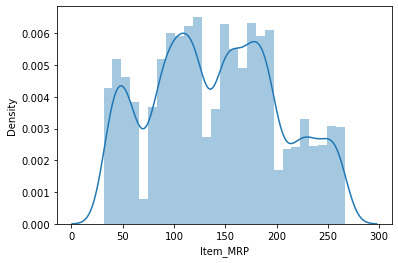

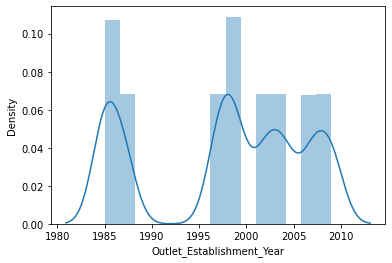

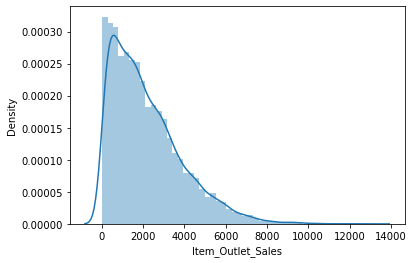

In [6]:
for i in Bigmart_train_Data.describe().columns:
    sns.distplot(Bigmart_train_Data[i].dropna())
    plt.show()

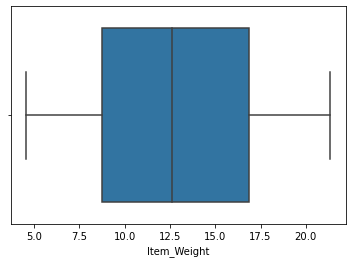

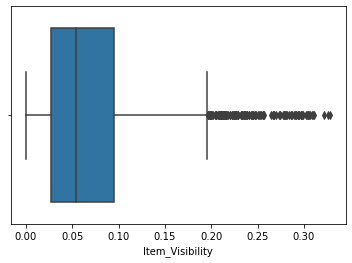

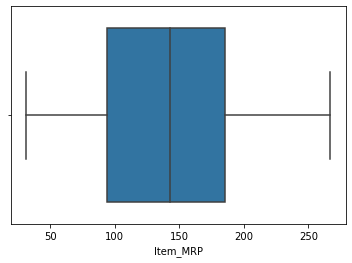

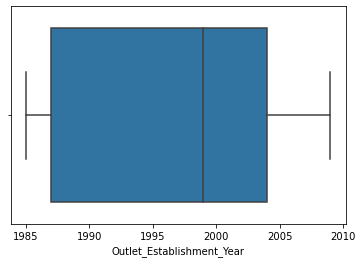

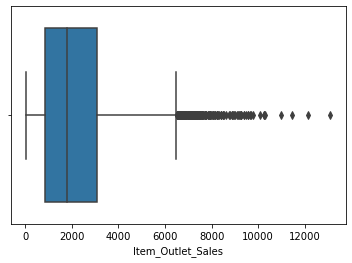

In [7]:
for i in Bigmart_train_Data.describe().columns:
    sns.boxplot(Bigmart_train_Data[i].dropna())
    plt.show()

## Univariate Analysis

Text(0.5, 0, 'Item_Type')

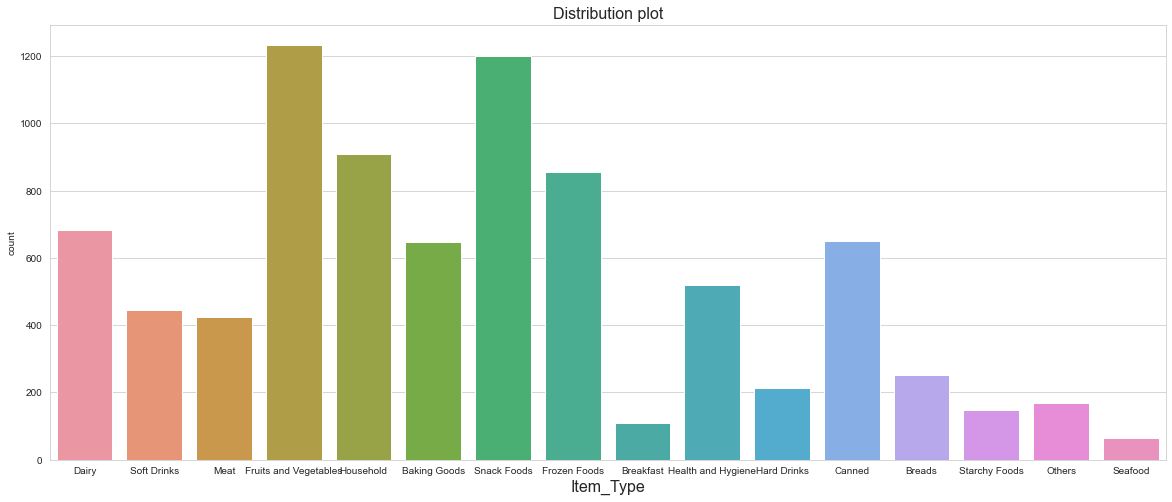

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
sns.countplot(x = 'Item_Type', data = Bigmart_train_Data)
plt.title('Distribution plot', fontsize=16)
plt.xlabel('Item_Type', fontsize=16)

In [9]:
Bigmart_train_Data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Text(0.5, 0, 'Item_Fat_Content')

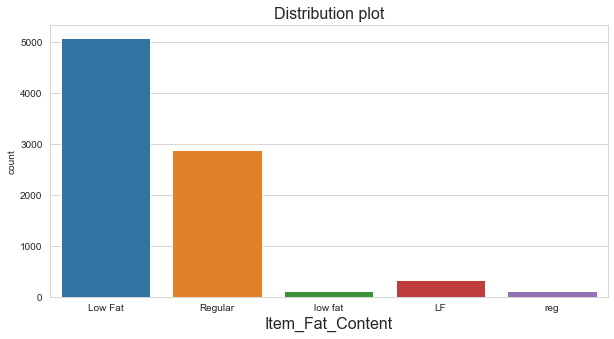

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(x = 'Item_Fat_Content', data = Bigmart_train_Data)
plt.title('Distribution plot', fontsize=16)
plt.xlabel('Item_Fat_Content', fontsize=16)

In [11]:
Bigmart_train_Data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Text(0.5, 0, 'Outlet_Size')

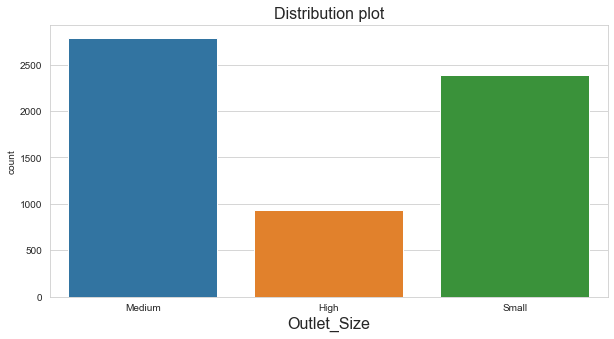

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(x = 'Outlet_Size', data = Bigmart_train_Data)
plt.title('Distribution plot', fontsize=16)
plt.xlabel('Outlet_Size', fontsize=16)

In [13]:
Bigmart_train_Data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Text(0.5, 0, 'Outlet_Location_Type')

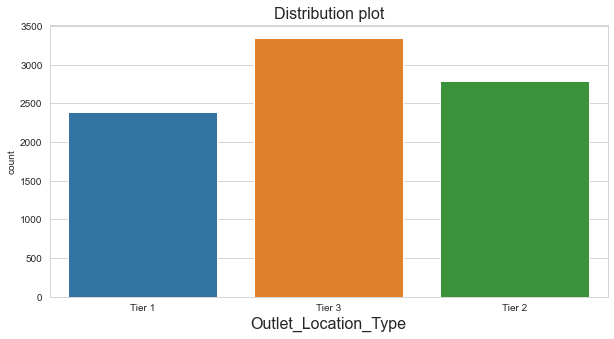

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(x = 'Outlet_Location_Type', data = Bigmart_train_Data)
plt.title('Distribution plot', fontsize=16)
plt.xlabel('Outlet_Location_Type', fontsize=16)

In [15]:
Bigmart_train_Data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Text(0.5, 0, 'Outlet_Type')

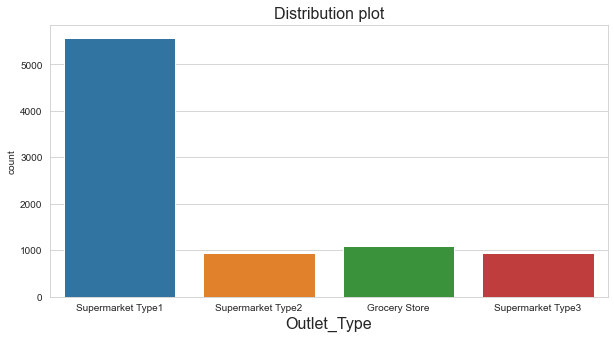

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(x = 'Outlet_Type', data = Bigmart_train_Data)
plt.title('Distribution plot', fontsize=16)
plt.xlabel('Outlet_Type', fontsize=16)

In [17]:
Bigmart_train_Data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Bivariate Analysis

Text(0, 0.5, 'Item_Weight')

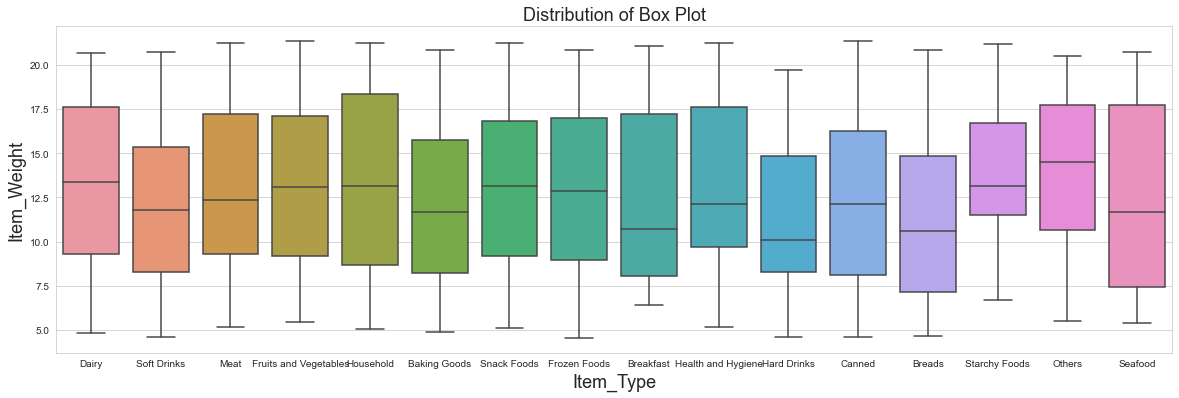

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
sns.boxplot(x = 'Item_Type', y = 'Item_Weight', data = Bigmart_train_Data)
plt.title('Distribution of Box Plot', fontsize = 18)
plt.xlabel('Item_Type', fontsize = 18)
plt.ylabel('Item_Weight', fontsize = 18)

Text(0, 0.5, 'Item_Visibility')

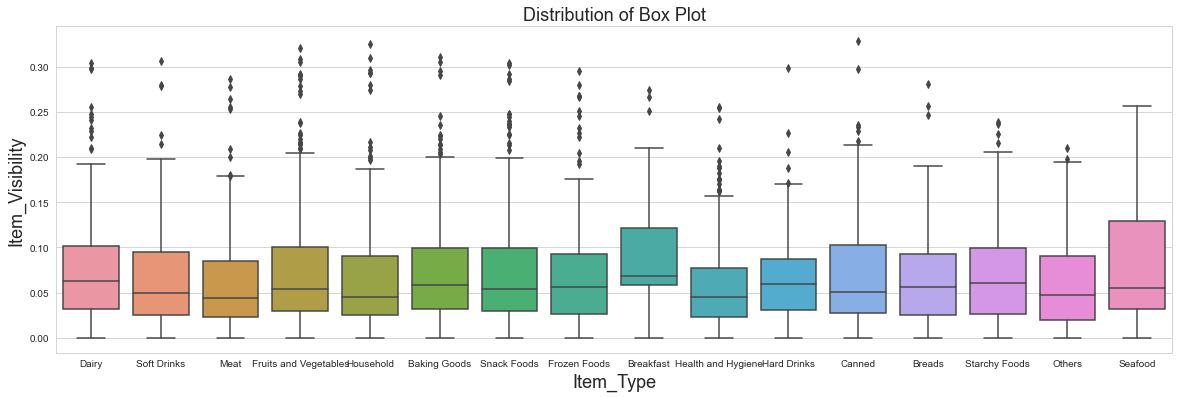

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
sns.boxplot(x = 'Item_Type', y = 'Item_Visibility', data = Bigmart_train_Data)
plt.title('Distribution of Box Plot', fontsize = 18)
plt.xlabel('Item_Type', fontsize = 18)
plt.ylabel('Item_Visibility', fontsize = 18)

Text(0, 0.5, 'Item_MRP')

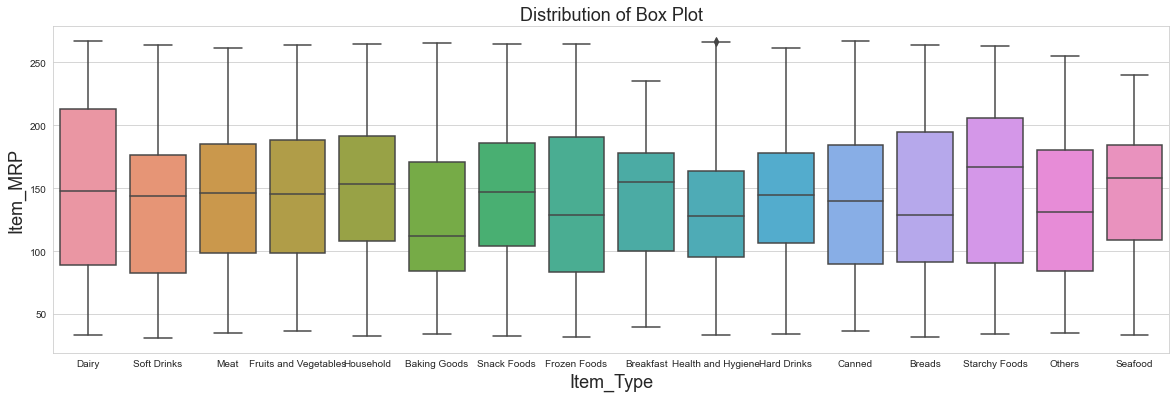

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
sns.boxplot(x = 'Item_Type', y = 'Item_MRP', data = Bigmart_train_Data)
plt.title('Distribution of Box Plot', fontsize = 18)
plt.xlabel('Item_Type', fontsize = 18)
plt.ylabel('Item_MRP', fontsize = 18)

Text(0, 0.5, 'Item_Outlet_Sales')

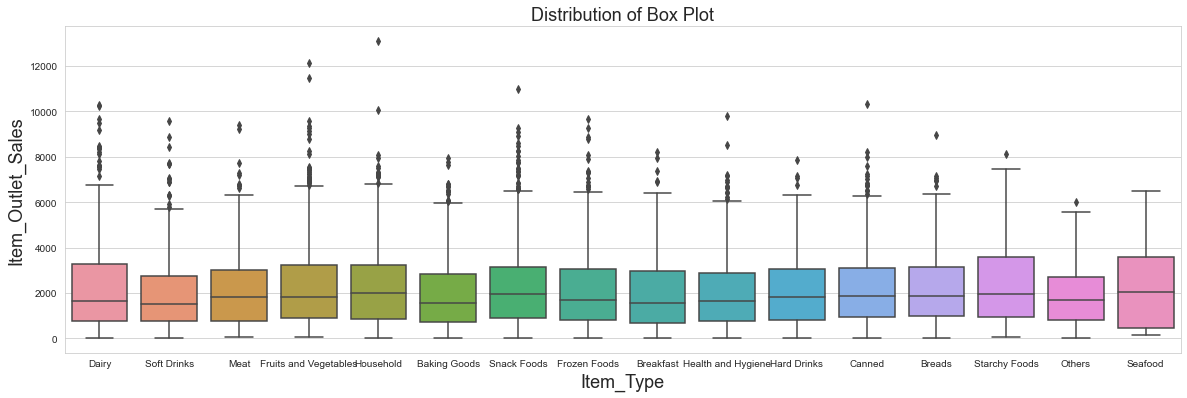

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
sns.boxplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = Bigmart_train_Data)
plt.title('Distribution of Box Plot', fontsize = 18)
plt.xlabel('Item_Type', fontsize = 18)
plt.ylabel('Item_Outlet_Sales', fontsize = 18)

Text(0, 0.5, 'Item_Outlet_Sales')

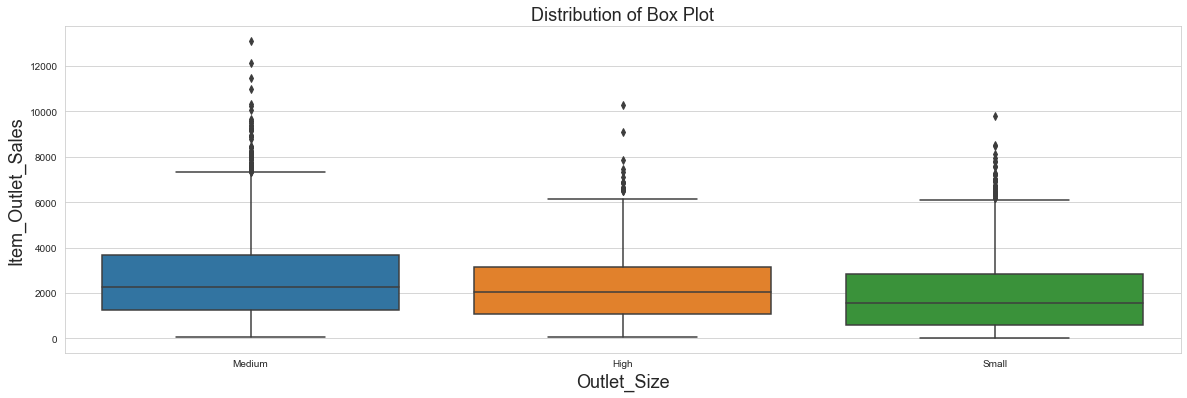

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = Bigmart_train_Data)
plt.title('Distribution of Box Plot', fontsize = 18)
plt.xlabel('Outlet_Size', fontsize = 18)
plt.ylabel('Item_Outlet_Sales', fontsize = 18)

## Correlation Matrix

In [23]:
Bigmart_train_Data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:title={'center':'Correlation'}>

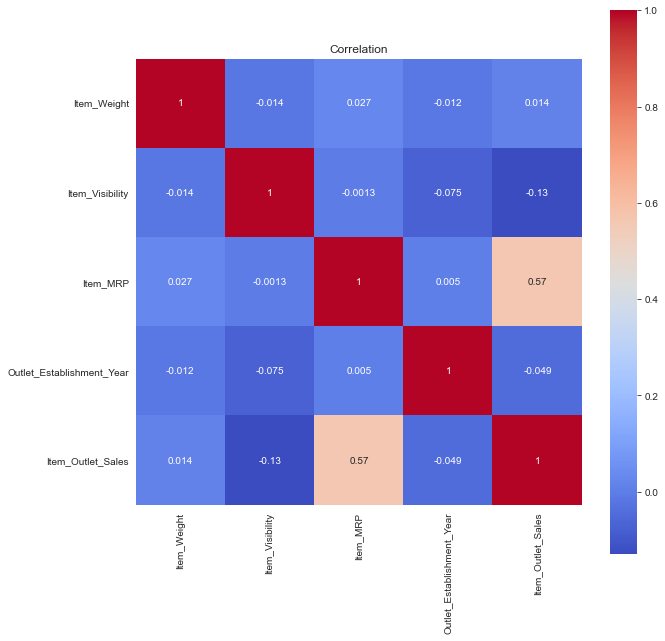

In [24]:
# First check out correlations among numeric features
# Heatmap is a useful tool to get a quick understanding of which variables are important

plt.figure(figsize=(10,10))
plt.title("Correlation")
sns.heatmap(Bigmart_train_Data.corr(), vmax=1, square=True, annot=True, cmap='coolwarm')

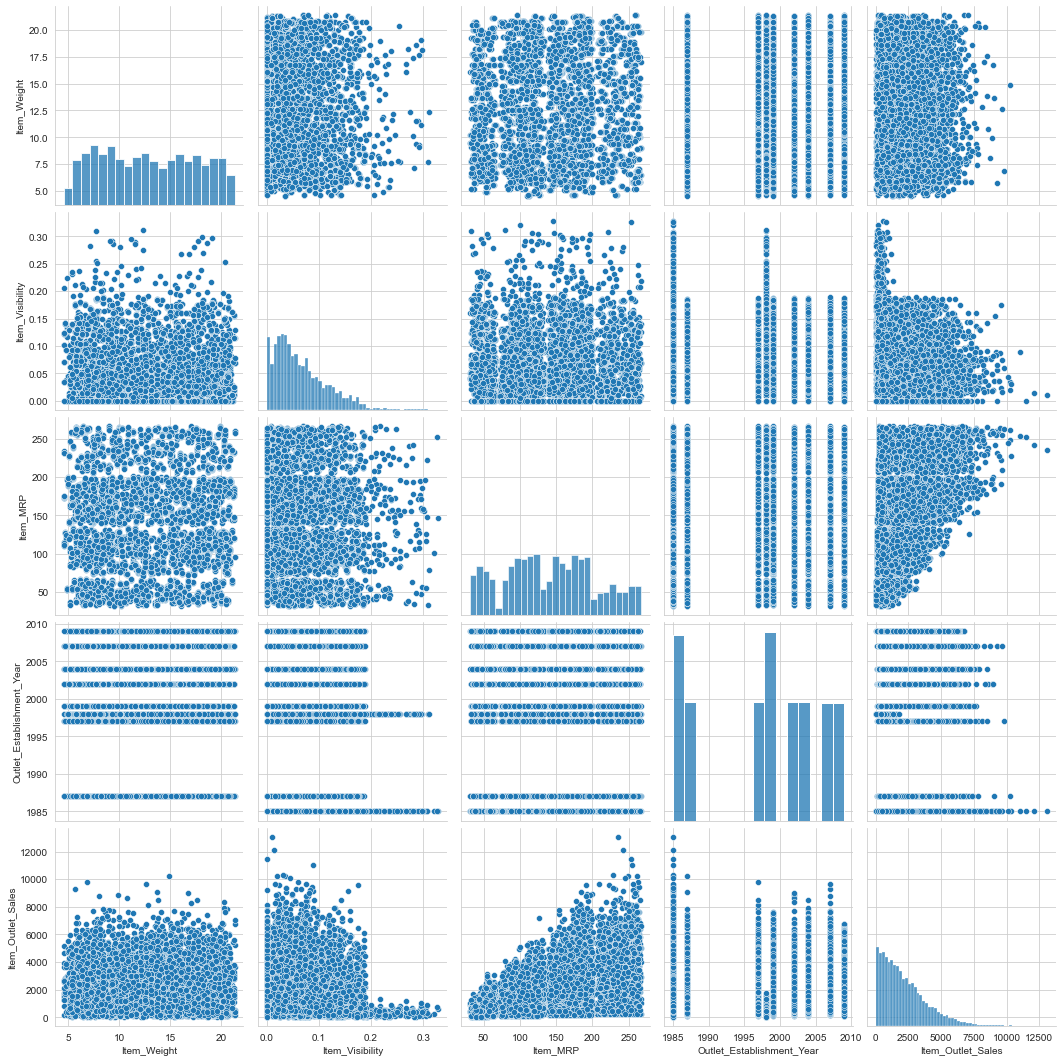

In [25]:
# Visualise the relationship between the features and the response using scatterplots
# Next, pair plot some important features

imp_feats = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

sns.pairplot(Bigmart_train_Data[imp_feats],   size = 3.0)

plt.show()

## Combine Test and Train

In [26]:
#Bigmart_train_Data['source'] = 'train'
#Bigmart_test_Data['source'] = 'test'
#Data = pd.concat((Bigmart_train_Data,Bigmart_test_Data), ignore_index = True)
#print(Bigmart_train_Data.shape, Bigmart_test_Data.shape, Data.shape)

Data = pd.concat([Bigmart_train_Data,Bigmart_test_Data], keys=('Train','Test'))


In [27]:
Data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
Train 0           FDA15         9.30          Low Fat         0.016047   
      1           DRC01         5.92          Regular         0.019278   
      2           FDN15        17.50          Low Fat         0.016760   
      3           FDX07        19.20          Regular         0.000000   
      4           NCD19         8.93          Low Fat         0.000000   

                     Item_Type  Item_MRP Outlet_Identifier  \
Train 0                  Dairy  249.8092            OUT049   
      1            Soft Drinks   48.2692            OUT018   
      2                   Meat  141.6180            OUT049   
      3  Fruits and Vegetables  182.0950            OUT010   
      4              Household   53.8614            OUT013   

         Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
Train 0                       1999      Medium               Tier 1   
      1                       2009      Medium               Tier 3   
      2                       1999      Medium               Tier 1   
      3                       1998         NaN               Tier 3   
      4                       1987        High               Tier 3   

               Outlet_Type  Item_Outlet_Sales  
Train 0  Supermarket Type1          3735.1380  
      1  Supermarket Type2           443.4228  
      2  Supermarket Type1          2097.2700  
      3      Grocery Store           732.3800  
      4  Supermarket Type1           994.7052

In [28]:
Data.tail()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
Test 5676           FDB58         10.5          Regular         0.013496   
     5677           FDD47          7.6          Regular         0.142991   
     5678           NCO17         10.0          Low Fat         0.073529   
     5679           FDJ26         15.3          Regular         0.000000   
     5680           FDU37          9.5          Regular         0.104720   

                    Item_Type  Item_MRP Outlet_Identifier  \
Test 5676         Snack Foods  141.3154            OUT046   
     5677       Starchy Foods  169.1448            OUT018   
     5678  Health and Hygiene  118.7440            OUT045   
     5679              Canned  214.6218            OUT017   
     5680              Canned   79.7960            OUT045   

           Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
Test 5676                       1997       Small               Tier 1   
     5677                       2009      Medium               Tier 3   
     5678                       2002         NaN               Tier 2   
     5679                       2007         NaN               Tier 2   
     5680                       2002         NaN               Tier 2   

                 Outlet_Type  Item_Outlet_Sales  
Test 5676  Supermarket Type1                NaN  
     5677  Supermarket Type2                NaN  
     5678  Supermarket Type1                NaN  
     5679  Supermarket Type1                NaN  
     5680  Supermarket Type1                NaN

## Let's check the summary of data

In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14204 entries, ('Train', 0) to ('Test', 5680)
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.7+ MB


In [30]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


### Observations:

* "Item_Visibility" has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.


* "Outlet_Establishment_Years" vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.


* The lower ‘count’ of "Item_Weight" and "Item_Outlet_Sales" confirms the findings from the missing value check.

## Total Unique Value

In [31]:
Data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

In [32]:
categorical_columns = [x for x in Data.dtypes.index if Data.dtypes[x]=='object']


categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]



for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (Data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

F

### Observations:

* Item_Fat_Content:  Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.


* Item_Type:  Not all categories have substantial numbers. It looks like combining them can give better results.

    
* Outlet_Type:  Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.

## Total Missing Values

In [33]:
# Total missing values in every column
total_missing = Data.isnull().sum()

# Calculate percentage
percentge = total_missing/Data.isnull().count()

# Combine total and percentage values
NAs = pd.concat([total_missing,percentge],axis=1,keys=('Total','Percentge(%)'))

# Getting columns where there are missing values
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)

,Total,Percentge(%)
Item_Outlet_Sales,5681,0.399958
Outlet_Size,4016,0.282737
Item_Weight,2439,0.171712


* "Item_Weight" have 2439 missing values which is approx 17% 

* "Outlet_Size" have 4016 missing values which is 28%

* "Item_Outlet_Sales" have 5681 missing values which is almost 40%

## Missing Value Treatment

### 1. Item_Weight

In [34]:
Data['Item_Weight'].mean()

12.792854228644991

In [35]:
Data['Item_Weight'].fillna(Data['Item_Weight'].mean(),inplace=True)

### 2. Outlet_Size

In [36]:
Data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [37]:
Data.Outlet_Size = Data.Outlet_Size.fillna('Medium')

### 3. Item_Outlet_Sales

In [38]:
Data['Item_Outlet_Sales'].mean()

2181.2889135750365

In [39]:
Data['Item_Outlet_Sales'].fillna(Data['Item_Outlet_Sales'].mean(),inplace=True)

In [40]:
Data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Feature Engineering

### 1. Combine Outlet_Type & Item_Outlet_Sales

In [41]:
Data.pivot_table(index = 'Outlet_Type', values = 'Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,1076.412666
Supermarket Type1,2262.232963
Supermarket Type2,2069.766739
Supermarket Type3,3088.550567


* Grocery Store have recorded 1076 sales.

* Supermarket Type1 have recorded 2262 sales.

* Supermarket Type2 have recorded 2069 sales.

* Supermarket Type3 have recorded 3088 sales.

### 2. Modify Item_Visibility

In [42]:
Data['Item_Visibility'].mean()

0.06595278007399345

In [43]:
sum(Data['Item_Visibility']==0)

879

In [44]:
Data.loc[Data['Item_Visibility'] == 0, 'Item_Visibility'] = Data.Item_Visibility.mean()

In [45]:
sum(Data['Item_Visibility']==0)

0

In [46]:
Data['Item_Visi_ratio'] = Data['Item_Visibility']/Data['Item_Visibility'].mean()

In [47]:
Data['Item_Visi_ratio'].describe()

count    14204.000000
mean         1.000000
std          0.693971
min          0.051042
25%          0.473246
50%          0.890237
75%          1.342733
max          4.689008
Name: Item_Visi_ratio, dtype: float64

### 3. Item_Type_Combined created from Item_Identifier

In [48]:
Data['Item_Type_Combined'] = Data.Item_Identifier.apply(lambda x:x[0:2])
Data['Item_Type_Combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

* Item_Identifier show as FD [Food], DR [Drinks], NC [Non-consumables]

In [49]:
Data['Item_Type_Combined'] = Data.Item_Type_Combined.map({'FD':'Food and Drinks','NC':'Non-Consumable','DR':'Drinks'})

In [50]:
Data['Item_Type_Combined'].value_counts()

Food and Drinks    10201
Non-Consumable      2686
Drinks              1317
Name: Item_Type_Combined, dtype: int64

Text(0, 0.5, 'Item_Outlet_Sales')

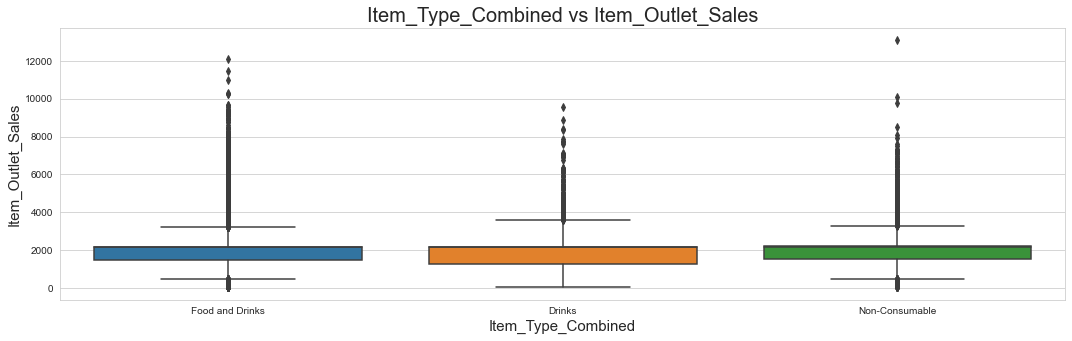

In [51]:
plt.figure(figsize = (18,5))
sns.boxplot(x = 'Item_Type_Combined', y = 'Item_Outlet_Sales', data = Data)
plt.title('Item_Type_Combined vs Item_Outlet_Sales', fontsize = 20)
plt.xlabel('Item_Type_Combined', fontsize = 15)
plt.ylabel('Item_Outlet_Sales', fontsize = 15)

### 4. Item_Fat_Content modify 

In [52]:
Data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [53]:
Data.Item_Fat_Content = Data.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

Data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [54]:
# Marking non-consumable as separate category in low fat:

Data.loc[Data['Item_Type_Combined'] == "Non-consumable",'Item_Fat_Content'] = "Non-Edible"

Data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

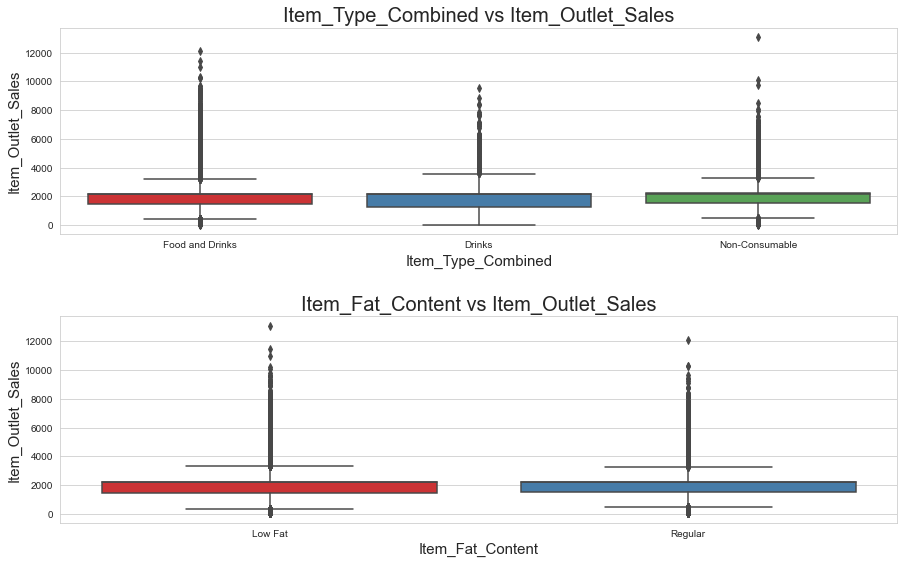

In [55]:
plt.figure(figsize = (15,5))

plt.subplot(211)
sns.boxplot(x = 'Item_Type_Combined', y = 'Item_Outlet_Sales', data = Data, palette = "Set1")
plt.title('Item_Type_Combined vs Item_Outlet_Sales', fontsize = 20)
plt.xlabel('Item_Type_Combined', fontsize = 15)
plt.ylabel('Item_Outlet_Sales', fontsize = 15)


plt.subplot(212)
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = Data, palette = "Set1")
plt.title('Item_Fat_Content vs Item_Outlet_Sales', fontsize = 20)
plt.xlabel('Item_Fat_Content', fontsize = 15)
plt.ylabel('Item_Outlet_Sales', fontsize = 15)
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

### 5. Years of operation of a Outlet

In [56]:
Data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [57]:
Data['Outlet_Years'] = 2010 - Data['Outlet_Establishment_Year']

In [58]:
Data['Outlet_Years'].describe()

count    14204.000000
mean        12.169319
std          8.371664
min          1.000000
25%          6.000000
50%         11.000000
75%         23.000000
max         25.000000
Name: Outlet_Years, dtype: float64

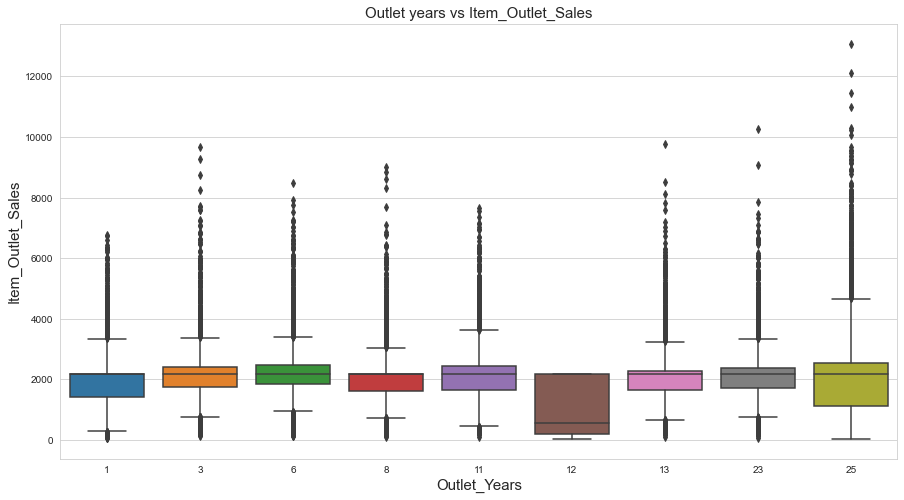

In [59]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'Outlet_Years', y = 'Item_Outlet_Sales', data = Data)
plt.title('Outlet years vs Item_Outlet_Sales', fontsize = 15)
plt.xlabel('Outlet_Years', fontsize = 15)
plt.ylabel('Item_Outlet_Sales', fontsize = 15)

plt.show()

### 6. Creating Avg of Item_Visibility

In [60]:
item_visib_avg = Data.pivot_table(values = 'Item_Visibility', index = 'Item_Identifier')

item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.049594
DRA24,0.045646
DRA59,0.139979
DRB01,0.087980
DRB13,0.014127
...,...
NCZ30,0.033897
NCZ41,0.064640
NCZ42,0.017610


In [61]:
function = lambda x: x['Item_Visibility'] /item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]

In [62]:
Data['item_visib_avg'] = Data.apply(function,axis=1).astype(float)

In [63]:
Data['item_visib_avg']

Train  0       0.931078
       1       0.933420
       2       0.696814
       3       2.029909
       4       2.076332
                 ...   
Test   5676    0.874729
       5677    0.878292
       5678    0.943636
       5679    0.694420
       5680    0.960472
Name: item_visib_avg, Length: 14204, dtype: float64

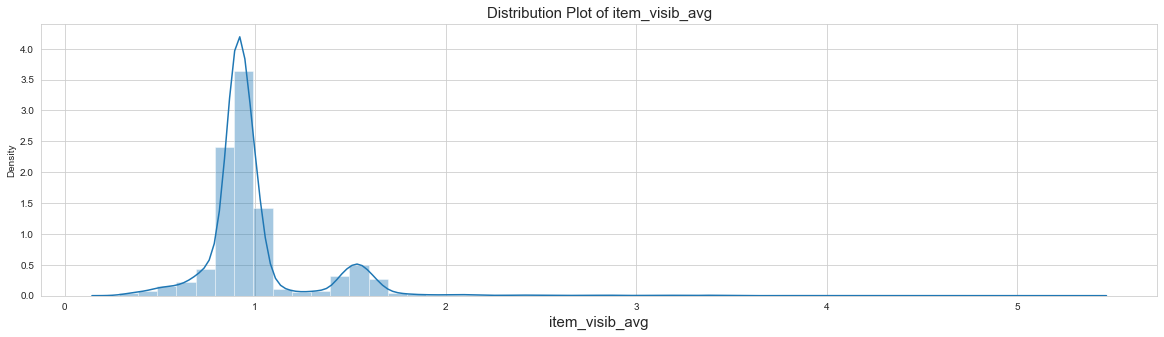

In [64]:
plt.figure(figsize = (20,5))
sns.distplot(Data['item_visib_avg'])
plt.title('Distribution Plot of item_visib_avg', fontsize = 15)
plt.xlabel('item_visib_avg', fontsize = 15)

plt.show()

## Encoding Categorical Variables

In [65]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

Data['Outlet'] = lb.fit_transform(Data['Outlet_Identifier'])


In [66]:
var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Outlet_Size','Item_Type_Combined']


for item in var:
    Data[item] = lb.fit_transform(Data[item])

In [67]:
Numerical_cols = Data.select_dtypes(include = np.number)

Numerical_cols.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
Train 0         9.30                 0         0.016047  249.8092   
      1         5.92                 1         0.019278   48.2692   
      2        17.50                 0         0.016760  141.6180   
      3        19.20                 1         0.065953  182.0950   
      4         8.93                 0         0.065953   53.8614   

         Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
Train 0                       1999            1                     0   
      1                       2009            1                     2   
      2                       1999            1                     0   
      3                       1998            1                     2   
      4                       1987            0                     2   

         Outlet_Type  Item_Outlet_Sales  Item_Visi_ratio  Item_Type_Combined  \
Train 0            1          3735.1380         0.229135                   1   
      1            2           443.4228         0.275269                   0   
      2            1          2097.2700         0.239313                   1   
      3            0           732.3800         0.941722                   1   
      4            1           994.7052         0.941722                   2   

         Outlet_Years  item_visib_avg  Outlet  
Train 0            11        0.931078       9  
      1             1        0.933420       3  
      2            11        0.696814       9  
      3            12        2.029909       0  
      4            23        2.076332       1

In [68]:
Categorical_cols = Data.select_dtypes(include = 'object')

Categorical_cols.head()

Item_Identifier              Item_Type Outlet_Identifier
Train 0           FDA15                  Dairy            OUT049
      1           DRC01            Soft Drinks            OUT018
      2           FDN15                   Meat            OUT049
      3           FDX07  Fruits and Vegetables            OUT010
      4           NCD19              Household            OUT013

## One Hot Encoding

* Creating Dummy variables

In [69]:
Data_dummies = pd.get_dummies(Data, columns=['Item_Fat_Content','Outlet_Location_Type',
                                             'Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [70]:
Data_dummies.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Item_Visi_ratio              float64
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [71]:
Data_dummies.drop(['Item_Type','Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'], axis = 1, inplace = True)

In [72]:
Data_dummies.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
Train 0         9.30         0.016047  249.8092          3735.1380   
      1         5.92         0.019278   48.2692           443.4228   
      2        17.50         0.016760  141.6180          2097.2700   
      3        19.20         0.065953  182.0950           732.3800   
      4         8.93         0.065953   53.8614           994.7052   

         Item_Visi_ratio  Outlet_Years  item_visib_avg  Item_Fat_Content_0  \
Train 0         0.229135            11        0.931078                   1   
      1         0.275269             1        0.933420                   0   
      2         0.239313            11        0.696814                   1   
      3         0.941722            12        2.029909                   0   
      4         0.941722            23        2.076332                   1   

         Item_Fat_Content_1  Outlet_Location_Type_0  ...  Outlet_0  Outlet_1  \
Train 0                   0                       1  ...         0         0   
      1                   1                       0  ...         0         0   
      2                   0                       1  ...         0         0   
      3                   1                       0  ...         1         0   
      4                   0                       0  ...         0         1   

         Outlet_2  Outlet_3  Outlet_4  Outlet_5  Outlet_6  Outlet_7  Outlet_8  \
Train 0         0         0         0         0         0         0         0   
      1         0         1         0         0         0         0         0   
      2         0         0         0         0         0         0         0   
      3         0         0         0         0         0         0         0   
      4         0         0         0         0         0         0         0   

         Outlet_9  
Train 0         1  
      1         0  
      2         1  
      3         0  
      4         0  

[5 rows x 32 columns]

## PreProcessing Data

* Divide into test and train

In [73]:
#Divide into test and train:
idx = pd.IndexSlice
train_df = Data_dummies.loc[idx[['Train',], :]]
test_df = Data_dummies.loc[idx[['Test',], :]]

In [74]:
X = Data_dummies.drop(columns=['Item_Outlet_Sales'])
Y = Data_dummies['Item_Outlet_Sales']

In [75]:
print(X.shape)
print(Y.shape)

(14204, 31)
(14204,)


## Modeling

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3 , random_state=42)

## Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [78]:
intercept = print(model.intercept_)

intercept

593.5658225479815


In [79]:
coefficients = pd.DataFrame(model.coef_,x_train.columns,columns=['coefficients'])
coefficients

,coefficients
Item_Weight,-3.159310
Item_Visibility,-1.322751
Item_MRP,9.601522
Item_Visi_ratio,-18.887214
Outlet_Years,11.242652
item_visib_avg,-16.045087
Item_Fat_Content_0,-21.718258
Item_Fat_Content_1,21.718258
Outlet_Location_Type_0,-79.954929
Outlet_Location_Type_1,60.050468


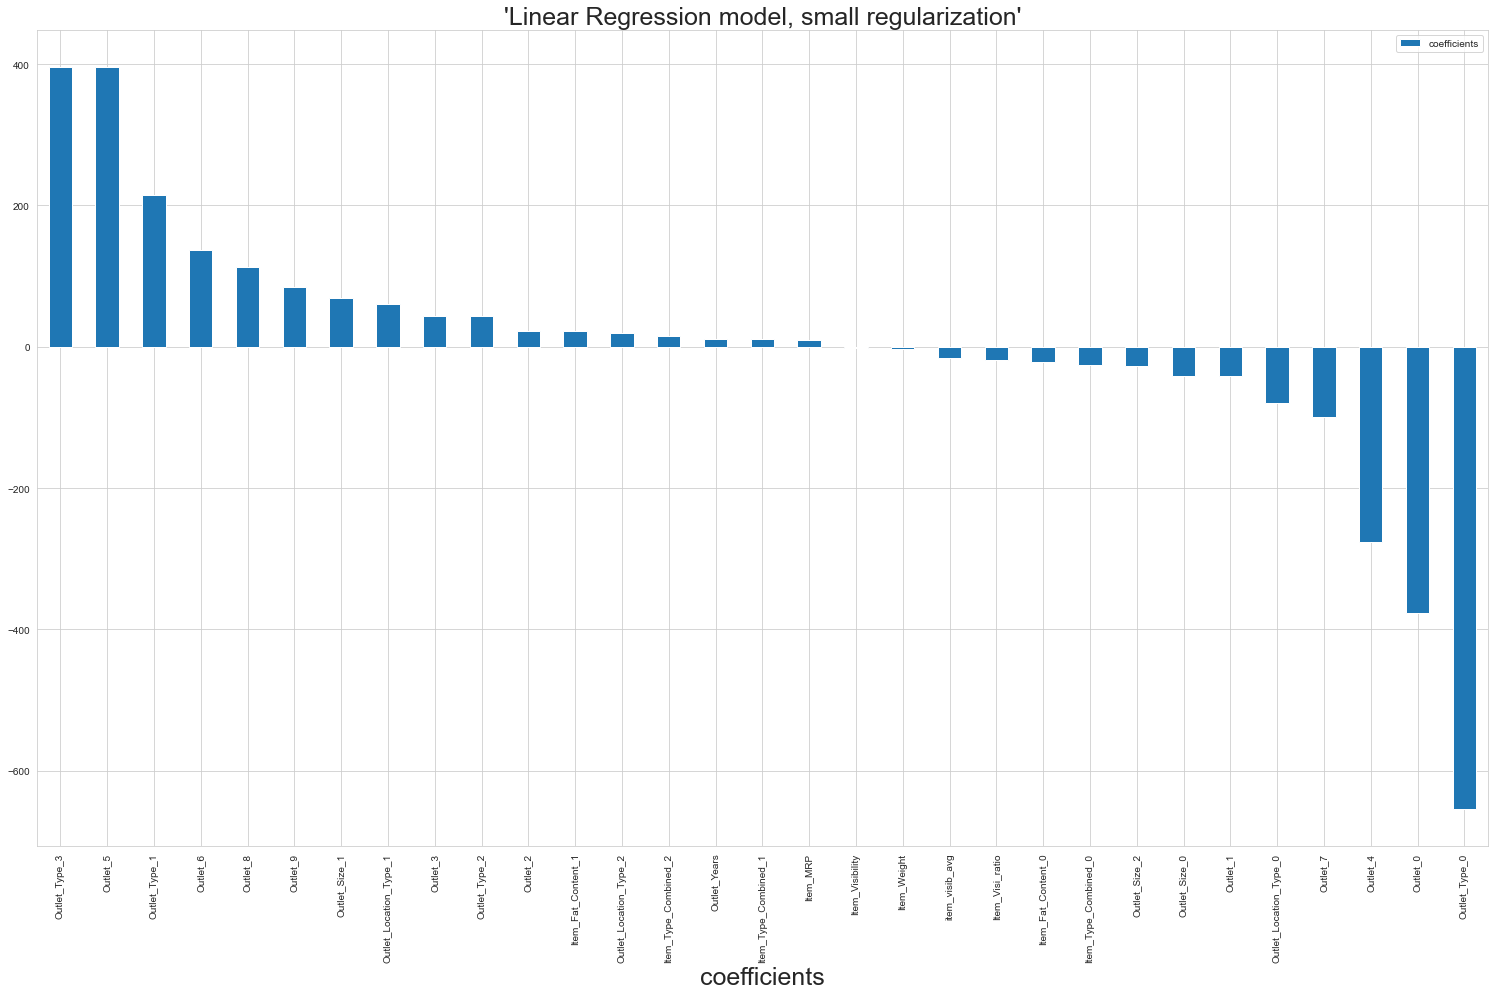

In [80]:
coefficients.sort_values('coefficients', ascending=False, inplace=True)
coefficients.plot(kind = 'bar', figsize=(26,15))
plt.xlabel("coefficients", size = '25')
plt.title("'Linear Regression model, small regularization'", size = '25')
plt.legend()

In [81]:
LR_pred = model.predict(x_test)

LR_pred

array([2800.0803287 , 2830.82929426, 2833.39082033, ..., 1620.89874451,
       2098.0621231 , 2325.21119096])

In [82]:
LR_pred - y_test

Test   5567     618.791415
Train  4098    1648.368494
Test   5406     652.101907
Train  7562   -4259.911986
Test   3666     437.940470
                  ...     
Train  8521    -119.759677
       3873     591.934569
       7105     645.501745
       4985   -1377.413877
       5196   -1327.367609
Name: Item_Outlet_Sales, Length: 4262, dtype: float64

Text(0.5, 0, 'Item_Outlet_Sales')

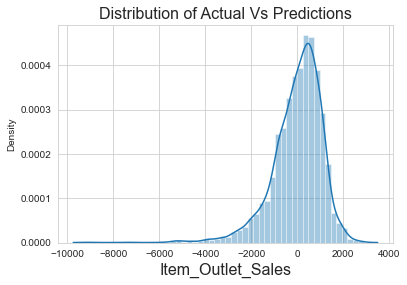

In [83]:
sns.distplot(LR_pred - y_test)
plt.title("Distribution of Actual Vs Predictions", fontsize=16)
plt.xlabel("Item_Outlet_Sales", fontsize=16)

Text(0, 0.5, 'Item_Outlet_Sales')

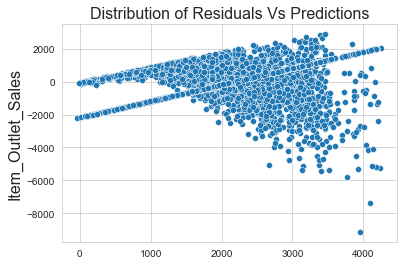

In [84]:
sns.scatterplot(x = LR_pred , y = LR_pred - y_test)
plt.title("Distribution of Residuals Vs Predictions", fontsize=16)
plt.ylabel("Item_Outlet_Sales", fontsize=16) 

In [85]:
LR_accuracy = round(model.score(x_train,y_train)*100)

print('Linear Regression Accuracy :', LR_accuracy)

Linear Regression Accuracy : 34


In [86]:
from sklearn import metrics
mean_square = metrics.mean_squared_error(y_test,LR_pred)

print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test,LR_pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test,LR_pred)))

Mean Square Error (MSE)       : 1141381.7903140076
Root mean Square Error (RMSE) : 1068.3547118415343


In [87]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model, x_train,y_train, cv=10, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
print ("\n Scores ")
print (cv_score)
#Print model report:
print ("\nModel Report")
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                         np.min(cv_score),np.max(cv_score)))


 Scores 
[1132.10874718 1034.91862506 1108.23263752 1059.84214935 1053.33070261
 1070.00059733 1083.11089948 1064.56974285 1059.15340771 1127.79406938]

Model Report
CV Score : Mean - 1079 | Std - 31.18 | Min - 1035 | Max - 1132


In [88]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
stats_model = sm.OLS(y_train,x_train_sm).fit()
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     322.9
Date:                Sun, 21 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:38:58   Log-Likelihood:                -83527.
No. Observations:                9942   AIC:                         1.671e+05
Df Residuals:                    9925   BIC:                         1.672e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    153.8218     16.656      9.235      0.000     121.173     186.471
Item_Weight               -3.1593      2.574     -1.227      0.220      -8.205       1.886
Item_Visibility           -1.3228      1.164     -1.136      0.256      -3.605       0.960
Item_MRP                   9.6015      0.174     55.196      0.000       9.261       9.943
Item_Visi_ratio          -18.8872     16.627     -1.136      0.256     -51.479      13.705
Outlet_Years              19.3997      1.616     12.005      0.000      16.232      22.567
item_visib_avg           -16.0451     42.758     -0.375      0.707     -99.860      67.770
Item_Fat_Content_0        55.1927     14.285      3.864      0.000      27.192      83.194
Item_Fat_Content_1        98.6292     15.741      6.266      0.000      67.774     129.484
Outlet_Location_Type_0   -53.2440     12.200     -4.364      0.000     -77.159     -29.329
Outlet_Location_Type_1   126.6045     13.778      9.189      0.000      99.596     153.613
Outlet_Location_Type_2    80.4613     14.162      5.681      0.000      52.701     108.222
Outlet_Size_0            -53.9435      9.889     -5.455      0.000     -73.329     -34.558
Outlet_Size_1            170.6389     14.848     11.492      0.000     141.534     199.744
Outlet_Size_2             37.1265     14.108      2.632      0.009       9.472      64.781
Outlet_Type_0           -630.8737     20.866    -30.234      0.000    -671.775    -589.972
Outlet_Type_1            302.1577     13.155     22.968      0.000     276.370     327.945
Outlet_Type_2            114.2515     14.810      7.714      0.000      85.220     143.283
Outlet_Type_3            368.2863     13.113     28.086      0.000     342.582     393.990
Item_Type_Combined_0      25.2669     27.070      0.933      0.351     -27.796      78.330
Item_Type_Combined_1      62.1613     18.353      3.387      0.001      26.185      98.137
Item_Type_Combined_2      66.3937     22.373      2.968      0.003      22.538     110.249
Outlet_0                -348.1329     22.904    -15.200      0.000    -393.028    -303.237
Outlet_1                 -53.9435      9.889     -5.455      0.000     -73.329     -34.558
Outlet_2                  53.9148     25.928      2.079      0.038       3.091     104.738
Outlet_3                 114.2515     14.810      7.714      0.000      85.220     143.283
Outlet_4                -282.7407     16.909    -16.721      0.000    -315.886    -249.595
Outlet_5                 368.2863     13.113     28.086      0.000     342.582     393.990
Outlet_6                 180.6636     20.146      8.968      0.000     141.173     220.155
Outlet_7                -107.9739     24.788     -4.356      0.000    -156.563     -59.384
Outlet_8                 139.2036     22.665      6.142      0.000      94.776  

## Regularized Linear Regression

### Ridge Regression

In [89]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

print ("RIDGE REGRESSION")
ridge_model = Ridge(alpha=0.05,normalize=True)
ridge_model.fit(x_train,y_train)
predictions = ridge_model.predict(x_test)

from sklearn import metrics
mean_square = metrics.mean_squared_error(y_test,predictions)

print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test,predictions))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

cv_score = cross_val_score(ridge_model, x_train,y_train, cv=10, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
print ("\n Scores ")
print (cv_score)
#Print model report:
print ("\nModel Report")
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                         np.min(cv_score),np.max(cv_score)))

RIDGE REGRESSION
Mean Square Error (MSE)       : 1140394.2853916755
Root mean Square Error (RMSE) : 1067.8924502924795

 Scores 
[1132.7181057  1037.28966266 1110.32537947 1057.15507643 1051.63900499
 1072.6142914  1085.81380864 1062.51063745 1058.17528157 1128.44887557]

Model Report
CV Score : Mean - 1080 | Std - 31.73 | Min - 1037 | Max - 1133


In [90]:
coefficients = pd.DataFrame(ridge_model.coef_,x_train.columns,columns=['coefficients'])
coefficients

,coefficients
Item_Weight,-2.772874
Item_Visibility,-152.565641
Item_MRP,9.142452
Item_Visi_ratio,-10.684813
Outlet_Years,2.738681
item_visib_avg,-37.164296
Item_Fat_Content_0,-20.531607
Item_Fat_Content_1,20.531607
Outlet_Location_Type_0,-46.923453
Outlet_Location_Type_1,28.104194


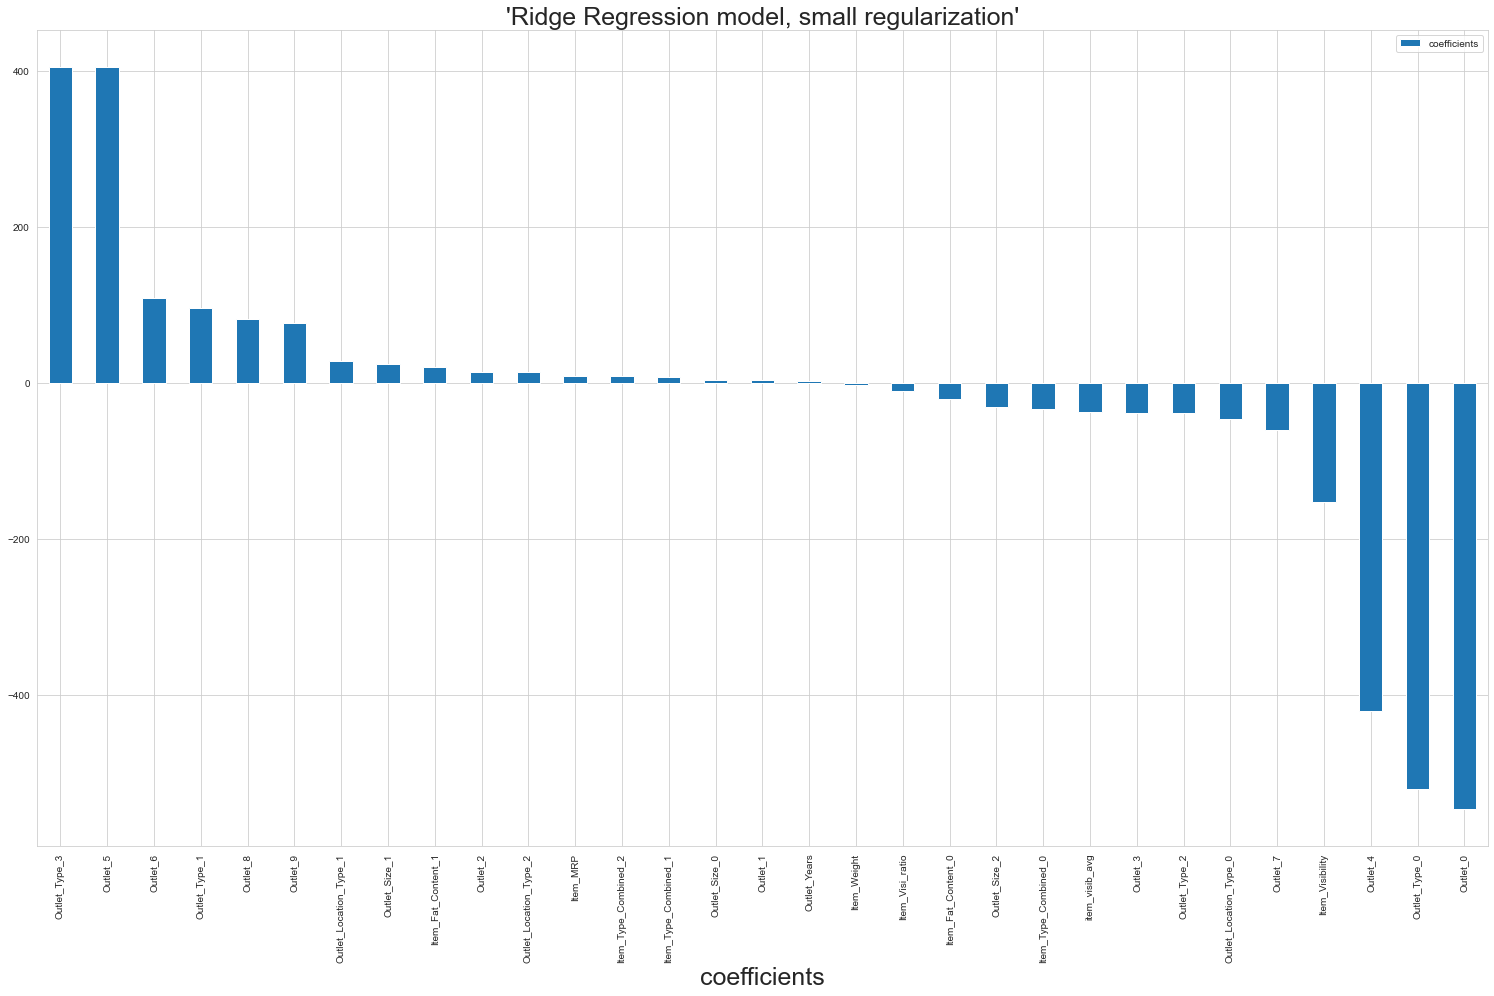

In [91]:
coefficients.sort_values('coefficients', ascending=False, inplace=True)
coefficients.plot(kind = 'bar', figsize=(26,15))
plt.xlabel("coefficients", size = '25')
plt.title("'Ridge Regression model, small regularization'", size = '25')
plt.legend()

### Lasso Regression

In [92]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

print ("LASSO REGRESSION")
lasso_model = Lasso(alpha=0.05,normalize=True)
lasso_model.fit(x_train,y_train)
predictions = lasso_model.predict(x_test)

from sklearn import metrics
mean_square = metrics.mean_squared_error(y_test,predictions)

print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test,predictions))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

cv_score = cross_val_score(lasso_model, x_train,y_train, cv=10, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
print ("\n Scores ")
print (cv_score)
#Print model report:
print ("\nModel Report")
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                         np.min(cv_score),np.max(cv_score)))

LASSO REGRESSION
Mean Square Error (MSE)       : 1140962.3677832987
Root mean Square Error (RMSE) : 1068.1584001370297

 Scores 
[1132.53299042 1034.7501043  1108.73339893 1058.5978425  1052.98106858
 1070.51636373 1083.54731344 1063.40082043 1058.85503604 1127.99287659]

Model Report
CV Score : Mean - 1079 | Std - 31.53 | Min - 1035 | Max - 1133


In [93]:
coefficients = pd.DataFrame(lasso_model.coef_,x_train.columns,columns=['coefficients'])
coefficients

,coefficients
Item_Weight,-1.882442e+00
Item_Visibility,-1.947692e+02
Item_MRP,9.519134e+00
Item_Visi_ratio,-2.261912e-03
Outlet_Years,0.000000e+00
item_visib_avg,-8.677955e+00
Item_Fat_Content_0,-3.281358e+01
Item_Fat_Content_1,7.150275e-15
Outlet_Location_Type_0,-0.000000e+00
Outlet_Location_Type_1,0.000000e+00


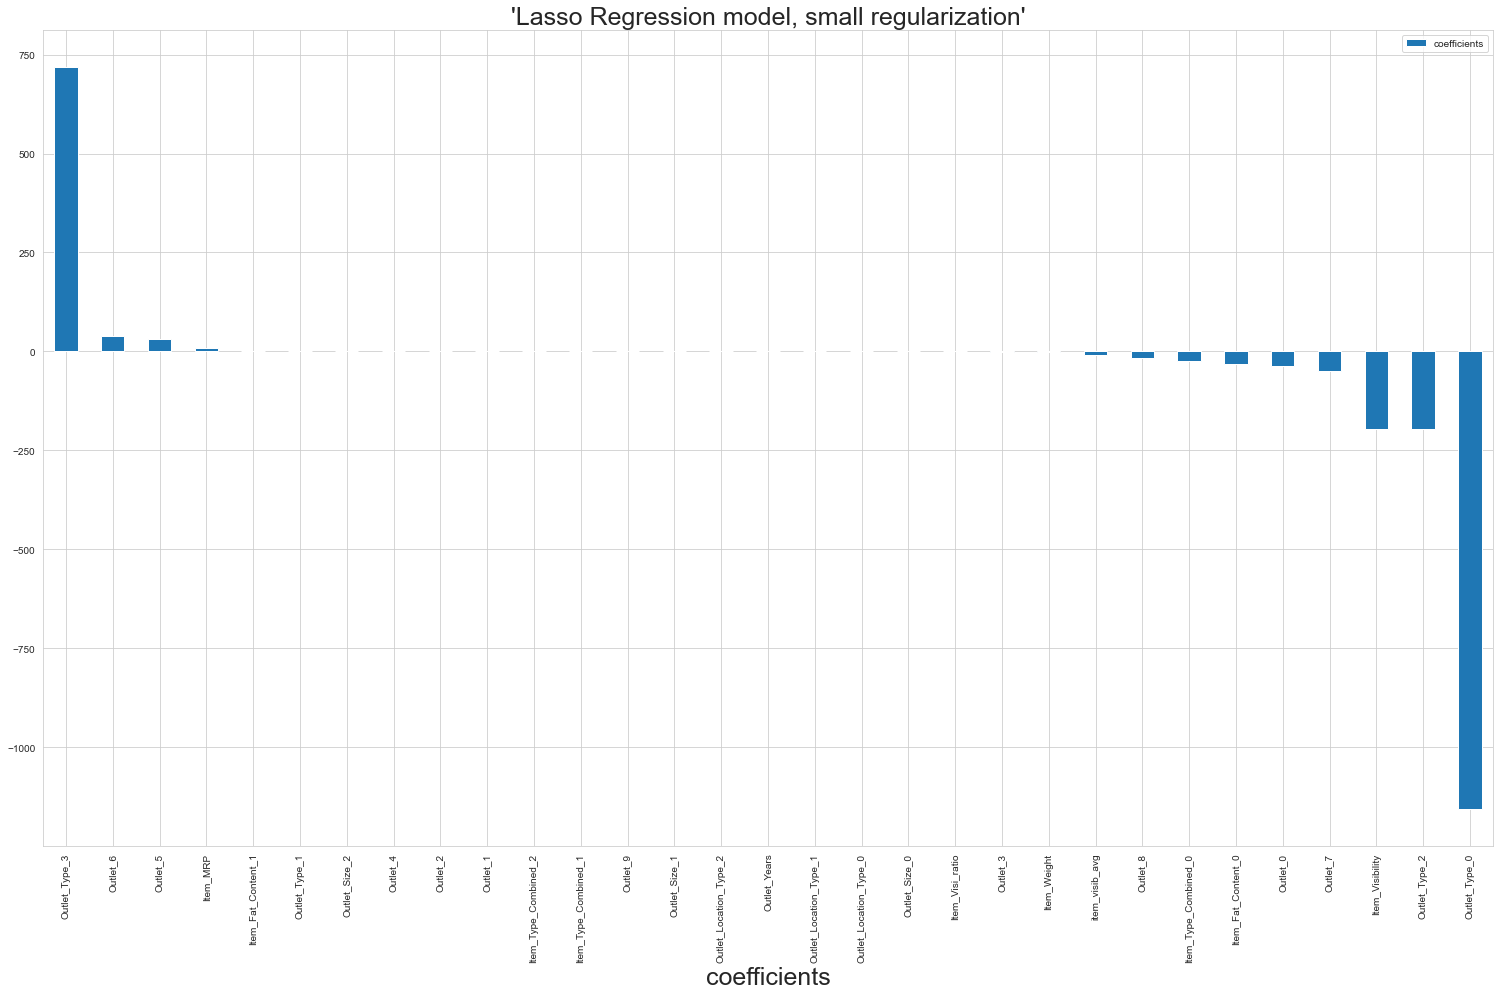

In [94]:
coefficients.sort_values('coefficients', ascending=False, inplace=True)
coefficients.plot(kind = 'bar', figsize=(26,15))
plt.xlabel("coefficients", size = '25')
plt.title("'Lasso Regression model, small regularization'", size = '25')
plt.legend()

## Random Forest Regression

In [95]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 600, max_depth = 6, min_samples_leaf = 120, n_jobs = 5)

RF.fit(x_train,y_train)

RF.pred = RF.predict(x_test)

RF.pred

array([2643.43159211, 2757.65295325, 2663.36798462, ..., 1076.53443747,
       2058.89071536, 2085.14772082])

In [96]:
RF_Accuracy = round(RF.score(x_train,y_train)*100)

print('Randdom Forest Regression Accuracy :', RF_Accuracy)

Randdom Forest Regression Accuracy : 37


In [97]:
from sklearn import metrics
mean_square = metrics.mean_squared_error(y_test,RF.pred)

print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test,RF.pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test,RF.pred)))

Mean Square Error (MSE)       : 1100039.692322356
Root mean Square Error (RMSE) : 1048.8277705716778


In [98]:
cv_score = cross_val_score(RF, x_train,y_train, cv=10, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
print ("\n Scores ")
print (cv_score)
#Print model report:
print ("\nModel Report")
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                         np.min(cv_score),np.max(cv_score)))


 Scores 
[1119.92547222 1030.62328519 1089.23472716 1052.56201159 1031.63654555
 1056.56954275 1069.49088799 1058.51031752 1047.1138448  1104.2163515 ]

Model Report
CV Score : Mean - 1066 | Std - 28.35 | Min - 1031 | Max - 1120


## XGBoost

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(max_depth= 2)

gbm.fit(x_train, y_train)

gbm_pred = gbm.predict(x_test)

In [100]:
from sklearn import metrics
mean_square = metrics.mean_squared_error(y_test,gbm_pred)

print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test,gbm_pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test,gbm_pred)))

Mean Square Error (MSE)       : 1099142.4847272479
Root mean Square Error (RMSE) : 1048.3999641011287


In [101]:
#KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
kfold = KFold(n_splits = 2, random_state = 100)
results = cross_val_score(gbm, x_train, y_train, cv = kfold)
print("Accuracy          : " , results.mean()*100)
print("standard deviation: " , results.std()*100)

Accuracy          :  35.177721158183836
standard deviation:  0.18399882445054305


In [102]:
cv_score = cross_val_score(gbm, x_train,y_train, cv=10, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
print ("\n Scores ")
print (cv_score)
#Print model report:
print ("\nModel Report")
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                         np.min(cv_score),np.max(cv_score)))


 Scores 
[1119.30280184 1033.93031955 1087.80360032 1055.28069235 1034.31657813
 1058.13352537 1068.06145665 1051.44511257 1049.0431273  1110.68358693]

Model Report
CV Score : Mean - 1067 | Std - 28.32 | Min - 1034 | Max - 1119


## Summary

#### LINEAR REGRESSION

* Linear Regression's MSE is 1141381.7903140076
* Linear Regression's RMSE is 1068.3547118415343
* Linear Regression's Cross ValidationScore (Mean) is 1079
* Linear Regression's Cross ValidationScore(Std) is 31.18



#### RIDGE REGRESSION

* Ridge Regression's MSE is 1140394.2853916755
* Ridge Regression's RSME is 1067.8924502924795
* Ridge Regression's Cross ValidationScore (Mean) is 1080
* Ridge Regression's Cross ValidationScore(Std) is 31.73



#### LASSO REGRESSION

* Lasso Regression's MSE is 1140962.3677832987
* Lasso Regression's RSME is 1068.1584001370297
* Lasso Regression's Cross ValidationScore (Mean) is 1079
* Lasso Regression's Cross ValidationScore(Std) is 31.53



#### Random Forest Regressor

* RandomForest Regression's MSE is 1100077.0068394635
* RandomForest Regression's RSME is 1048.8455590979368
* RandomForest Regression's Cross ValidationScore (Mean) is 1066
* RandomForest Regression's Cross ValidationScore(Std) is 28.34



#### GradientBoostingRegressor (XGBOOST)

* XGBOOST Regression's MSE is 1099142.4847272476
* XGBOOST Regression's RSME is 1048.3999641011285
* XGBOOST Regression's Cross ValidationScore (Mean) is 1067
* XGBOOST Regression's Cross ValidationScore(Std) is 28.33


## Conclusions: 

* In present era of digitally connected world every shopping mall desires to knowthe customer demands beforehand to avoid the shortfall of sale items in all sea-sons. Day to day the companies or the malls are predicting more accurately the demand of product sales or user demands. Extensive research in this area atenterprise level is happening for accurate sales prediction. 



* As the proﬁt madeby a company is directly proportional to the accurate predictions of sales, theBig marts are desiring more accurate prediction algorithm so that the companywill not suﬀer any losses. 



* In this research work, we have designed a predictivemodel by modifying Gradient boosting machines as Xgboost technique and ex-perimented it on the 2013 Big Mart dataset for predicting sales of the productfrom a particular outlet. Experiments support that our technique produce moreaccurate prediction compared to than other available techniques like Linear, ridge regression , RandomForest Regression etc. 



* Finally a comparison of diﬀerent models is summa-rized. From it is also concluded that our model with lowest MSE and RMSE performs better compared to existing models.